# Who is our audience survey 

## Quantitative analysis

### Import packages

In [1]:
import seaborn as sns
import pandas as pd
from IPython.display import display, HTML

import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# for plotting purposes
%matplotlib inline

### Import Beta Loop11 Scripts

In [2]:
import loop11_functions as beta
%run loop11_functions.py

### Import data

In [105]:
df = pd.read_csv('audience_updated_columns.csv', encoding='latin-1')
df.head()

,Unnamed: 0,UserZoom ID,Status,Start Date,End Date,"Have you visited ATO Beta before? (For example, tested a new product, read a blog post, received an email) *",How did you find out about ATO Beta?,How did you find out about ATO Beta? - 1,How did you find out about ATO Beta? - 2,How did you find out about ATO Beta? - 3,...,Which of the following best describes you? - 3,Which of the following best describes you? - 4,Which of the following best describes you? - 5,Which of the following best describes you? - 6,Which of the following best describes you? - 7,How do you usually lodge your tax return?,How do you usually lodge your tax return? - 1,How do you usually lodge your tax return? - 2,How do you usually lodge your tax return? - 3,How do you usually lodge your tax return? - 4
0,3,C881S14_113,Complete,13/07/17 12:08,13/07/17 12:13,Not sure,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,online via myTax,NaN,NaN,NaN,NaN
1,4,C881S14_118,Complete,13/07/17 12:10,13/07/17 13:19,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Other,employee,NaN,NaN,through a tax agent,NaN,NaN
2,5,C881S14_121,Complete,13/07/17 12:11,13/07/17 12:13,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,online via myTax,NaN,NaN,NaN,NaN
3,6,C881S14_123,Complete,13/07/17 12:12,13/07/17 12:14,Yes,NaN,Facebook,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,through a tax agent,NaN,NaN
4,7,C881S14_124,Complete,13/07/17 12:13,13/07/17 12:15,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,online via myTax,NaN,NaN,NaN,NaN


In [106]:
N = len(df)
N

117

In [107]:
list(df.columns.values) # For reference later when picking out data in specific column

['Unnamed: 0',
 'UserZoom ID',
 'Status',
 'Start Date',
 'End Date',
 'Have you visited ATO Beta before? (For example, tested a new product, read a blog post, received an email) *',
 'How did you find out about ATO Beta?',
 'How did you find out about ATO Beta? - 1',
 'How did you find out about ATO Beta? - 2',
 'How did you find out about ATO Beta? - 3',
 'How did you find out about ATO Beta? - 4',
 'How did you find out about ATO Beta? - 5',
 'How did you find out about ATO Beta? - 6',
 'How did you find out about ATO Beta? - 7',
 'What would be the best way to let you know about new ATO Beta tests, blogs and updates?',
 'What would be the best way to let you know about new ATO Beta tests, blogs and updates? - 1',
 'What would be the best way to let you know about new ATO Beta tests, blogs and updates? - 2',
 'What would be the best way to let you know about new ATO Beta tests, blogs and updates? - 3',
 'What would be the best way to let you know about new ATO Beta tests, blogs and 

## Play with multiple answer questions

SAMPLE SIZE: 120
NO. ANSWERS: 135


,How did you find out about ATO Beta? * (N),How did you find out about ATO Beta? * (%)
Colleague or friend,28,0.233333
Facebook,4,0.033333
Twitter,1,0.008333
LinkedIn,1,0.008333
ATO newsletter,65,0.541667
Presentation,10,0.083333
Other,26,0.216667


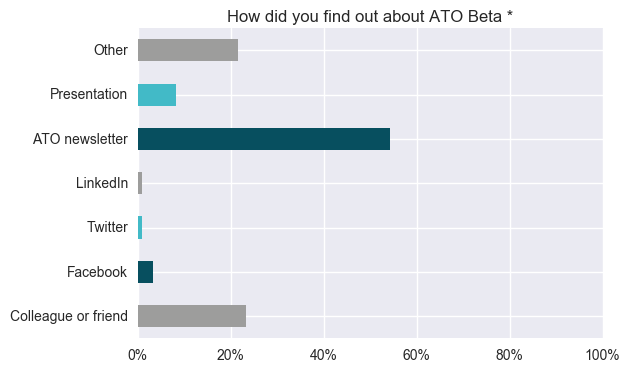

In [93]:
q = 'How did you find out about ATO Beta? *'
n_options = 7

def multiple_answer_userzoom(df, q, n_options, graph_type, file_location):
    # Get sample size before the answers are split up.
    sample_size = len(df[q])

    # get the column index 
    col_idx = df.columns.get_loc(q)

    counts = []
    perc = []
    for i in range(0, n_options):
        c = pd.value_counts(df[[col_idx+i]].values.flatten())
        counts.append(c)
        perc.append(c/sample_size)

    # Concatenate the results list into one DataFrame
    c_result = pd.DataFrame(pd.concat(counts))
    p_result = pd.DataFrame(pd.concat(perc))
    all_results = pd.concat([c_result,p_result], axis=1)
    all_results.columns = [q + ' (N)', q + ' (%)']

    # print sample size, total number of answers received and graph of the results
    print('SAMPLE SIZE: ' + str(sample_size))
    total_answers = all_results[q + ' (N)'].sum(axis=0)
    print('NO. ANSWERS: ' + str(total_answers))

    # Display the results DataFrame
    display(all_results)

    # Graph the results
    title = q.replace('"', '')
    title = title.replace('?', '')
    title = (title[:100] + '...') if len(title) > 100 else title
    graph_type(all_results, [q + ' (%)'], title, file_location)

    
    
multiple_answer_userzoom(df, q, n_options, beta.grapher_horizontal, '')

### Display other results (for relevant questions)

In [58]:
np.random.seed(2015)
data = []
for i in range(5):
    data.append(dict(zip(np.random.choice(10, replace=False, size=5),
                         np.random.randint(10, size=5))))
df = pd.DataFrame(data)
print(df)

     0    1    2    3    4    5    6    7    8    9
0  6.0  NaN  NaN  8.0  5.0  NaN  NaN  7.0  0.0  NaN
1  NaN  9.0  6.0  NaN  2.0  NaN  1.0  NaN  NaN  2.0
2  NaN  2.0  2.0  1.0  2.0  NaN  1.0  NaN  NaN  NaN
3  6.0  NaN  6.0  NaN  4.0  4.0  0.0  NaN  NaN  NaN
4  NaN  9.0  NaN  9.0  NaN  7.0  1.0  9.0  NaN  NaN


In [94]:
def other_responses(df, question):
    responses = []

    responses.append(pd.DataFrame(df[question]))
    responses = pd.concat(responses, axis=1)
    responses = responses[responses[question].notnull()]

    print('NUMBER OF RESPONSES: ' , len(responses))
    
    for item in responses[question]:
        display(item)

In [95]:
other_responses(df, 'Unnamed: 12')

NUMBER OF RESPONSES:  26


'Other'

'ato website'

'Just surfing the web'

'an email mentioned it'

'ATO Open Forum'

'email from ato'

'Email from the ATO, I think'

'myATO'

'Email from ATO?'

'do not recall'

'Internet research'

'Can not remember.  Quite a while back.'

'Chartered Accountants ANZ'

'Twitter'

'email'

'ato.gov.au'

'Found via SharePoint'

'Email to participate'

'Change Network'

'Internal ATO'

'Originally on the ATO website when i was doing my tax return last year'

'not sure - maybe twitter'

'ATO'

'Cant remember'

'Worked in the web publishing/web management area.'

'I work in the ATO'

## Single answer questions


In [108]:
q1 = 'Have you visited ATO Beta before? (For example, tested a new product, read a blog post, received an email) *'

SAMPLE SIZE: 117 (Have you visited ATO Beta before? (For example, tested a new product, read a blog post, received an email) *)
TOTAL %: 0.9999999999999999 (Have you visited ATO Beta before? (For example, tested a new product, read a blog post, received an email) *)


,"Have you visited ATO Beta before? (For example, tested a new product, read a blog post, received an email) * (N)","Have you visited ATO Beta before? (For example, tested a new product, read a blog post, received an email) * (%)"
No,8,0.068376
Not sure,5,0.042735
Yes,104,0.888889


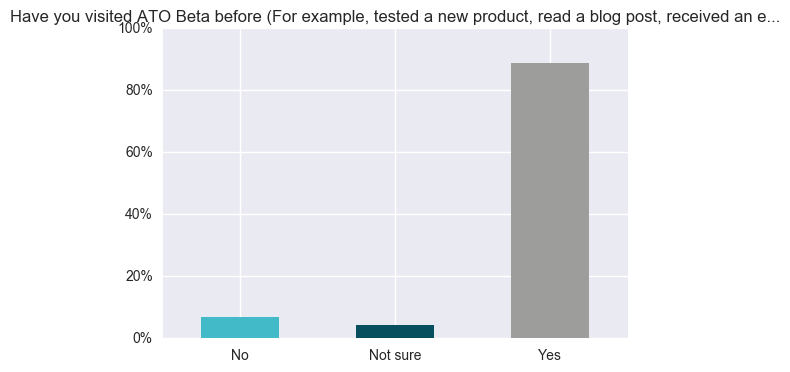

In [111]:


def single_answer(df, q, graph_type, file_location):

    results = []

    results.append(pd.DataFrame(df[q].value_counts(dropna=True)))
    results.append(pd.DataFrame(df[q].value_counts(normalize=True, dropna=True)))

    # Concatenate the list DataFrames into a single DataFrame
    results = pd.concat(results, axis=1)

    # Rename columns in the DataFrame.
    results.columns = [q + ' (N)', q + ' (%)']


    # Print sample size, % total and graph for each question
    # Note: % total is for quality control. The total should be 1.0 if question was required.
    sample_size = results[q + ' (N)'].sum(axis=0)
    print('SAMPLE SIZE: ' + str(sample_size) + ' (' + q + ')')
    total_count = results[q + ' (%)'].sum(axis=0)
    print('TOTAL %: '  + str(total_count) + ' (' + q + ')')

    # Sort dataframe rows
    results.sort_index(axis=0, ascending=True, inplace=True)

    # Display the results DataFrame
    display(results)

    # Graph the results
    title = q.replace('"', '')
    title = title.replace('?', '')
    title = (title[:100] + '...') if len(title) > 100 else title
    graph_type(results, [q + ' (%)'], title, file_location)

    
    
single_answer(df, q1, beta.grapher, '')

## Likert scale questions

In [113]:
q2 = 'How satisfied are you with ATO Beta emails?'

,How satisfied are you with ATO Beta emails?
count,117.000000
mean,3.581197
std,0.685305
min,1.000000
25%,3.000000
50%,4.000000
75%,4.000000
max,5.000000


TOTAL %: 0.9999999999999999 (How satisfied are you with ATO Beta emails?)


,How satisfied are you with ATO Beta emails? (N),How satisfied are you with ATO Beta emails? (%)
Neutral,27,0.306818
Satisfied,60,0.681818
Unsatisfied,1,0.011364


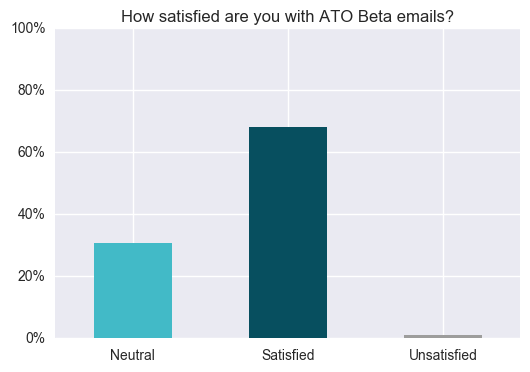

In [124]:


def likert_results(df, q, graph_type, file_location):

    results_compact = []
    results_numerical = []

    # Convert to numerical data for calculation of mean and std dev.
    # 1 = SD, 2 = D, 3 = N A/D, 4 = A, 5 = SA

    #first for the Agree/Disagree scale
    temp = df[q].replace('Strongly agree', 5, regex=True)
    temp = temp.replace('Agree', 4, regex=True)
    temp = temp.replace('Neither agree nor disagree', 3, regex=True)
    temp = temp.replace('Disagree', 2, regex=True)
    temp = temp.replace('Strongly disagree', 1, regex=True)
    # next for the satisfaction scale
    temp = temp.replace('Very satisfied', 5, regex=True)
    temp = temp.replace('Satisfied', 4, regex=True)
    temp = temp.replace('Neutral', 3, regex=True)
    temp = temp.replace('Unsatisfied', 2, regex=True)
    temp = temp.replace('Very unsatisfied', 1, regex=True)
    temp = temp.replace('NaN', 3, regex=True)
    results_numerical.append(pd.DataFrame(temp))

    # Concatenate the list into a DataFrame and use describe() to get the mean and std dev.
    results_numerical = pd.concat(results_numerical, axis=1)
    display(pd.DataFrame(results_numerical.describe()))

    # Compact standard Likert answers to three-point scale.
    # Create a list with question value counts (both number counts and as a percentage of the total).
    temp = df[q].replace('Strongly agree', 'Agree', regex=True)
    temp = temp.replace('Strongly disagree', 'Disagree', regex=True)
    temp = temp.replace('Very satisfied', 'Satisfied', regex=True)
    temp = temp.replace('Very unsatisfied', 'Unsatisfied', regex=True)
    temp = temp.replace('NaN', 3, regex=True)
    results_compact.append(pd.DataFrame(temp.value_counts()))
    results_compact.append(pd.DataFrame(temp.value_counts(normalize=True)))

    # Concatenate the list DataFrames into a single DataFrame
    results_compact = pd.concat(results_compact, axis=1)

    # Rename columns in the DataFrame.
    results_compact.columns = [q + ' (N)', q + ' (%)']

    # Sort dataframe rows
    results_compact.sort_index(axis=0, ascending=True, inplace=True)

    total_count = results_compact[q + ' (%)'].sum(axis=0)
    print('TOTAL %: '  + str(total_count) + ' (' + q + ')')

    display(results_compact)

    title = q.replace('"', '')
    graph_type(results_compact, [q + ' (%)'], title, file_location)

    
    
likert_results(df, q2, beta.grapher, '')